# Comparison of basic vs. improved CNN models

In [ ]:
# Necessary Imports
import os
import zipfile
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Input, Conv2D, Dense, Flatten, Dropout,
                                     BatchNormalization, MaxPooling2D, GlobalMaxPooling2D)
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import accuracy_score

# Avoid unwanted warnings
warnings.filterwarnings('ignore')

# Training a CNN on a dataset

About the dataset:

In CIFAR-10, there are 60000, 32x32 color images from these 10 classes, with 6000 images from each class. The training dataset contains 50,000 training images and the test dataset contains 10000 test images.
<br><br>
The dataset images are of color images with a (32 x 32) resolution. All the images in the dataset are of shape (32,32,3) where 3 represents the number of channels i.e R-G-B (Red,Green & Blue).

<img src="https://production-media.paperswithcode.com/datasets/4fdf2b82-2bc3-4f97-ba51-400322b228b1.png" align="center">


### <h3 style="background-color:#0071c5;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Importing Libraries & Packages 📚 </centre></strong></h3>

In [ ]:
# getting started with the model
# importing required libraries/packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf


# Imports related to different layers that are to be included in CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

# to ignore unwanted warnings
import warnings
warnings.filterwarnings('ignore')



### <h3 style="background-color:#0071c5;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre> Importing & Reading the dataset </centre></strong></h3>

The keras module has inbuilt datasets and cifar-10 is one among them. So we can simply import the dataset from keras

In [ ]:
# importing the cifar dataset
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [ ]:
print('X_train Shape: {}'.format(X_train.shape))
print('X_test Shape: {}'.format(X_test.shape))
print('Y_train Shape: {}'.format(Y_train.shape))
print('Y_test Shape: {}'.format(Y_test.shape))

X_train Shape: (50000, 32, 32, 3)
X_test Shape: (10000, 32, 32, 3)
Y_train Shape: (50000, 1)
Y_test Shape: (10000, 1)


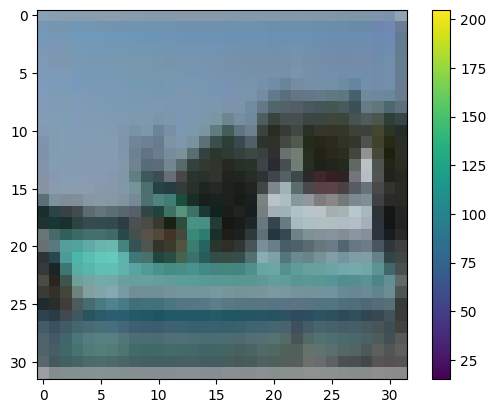

In [ ]:
plt.figure()
plt.imshow(X_train[111])
plt.colorbar()

### <h3 style="background-color:#0071c5;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Normalizing and One-Hot Encoding 🗝</centre></strong></h3>

To lower the pixel values, we must first normalise the data. All of the image pixels are currently in the range of 0–255, and we want them to be in the range of 0 and 1. So we can either divide all the pixel values by 255.0 or use the ‘normalize’ command from keras library. As CIFAR-10 has 10 classes, we are using the ‘to_categorical()’ method to one-hot encode the data.

In [ ]:
# Normalizing
X_train_en = X_train/255
X_test_en = X_test/255.0

# One-Hot-Encoding
Y_train_en = to_categorical(Y_train,10)
Y_test_en = to_categorical(Y_test,10)

print(Y_test_en[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


### Some basic layers

1. Conv2D() -> Layer that performs 2D convolutions
2. MaxPooling2D() -> Performs max pooling operation, using the filter we provide
3. Flatten() -> Used to perform flattening before we pass to FC layers
4. Dense() -> The FC layers
5. Dropout() -> Adds dropout to a layer.

### Some basic functions.
1. Sequential() -> Used to initialize a Neural network architecture to which different layers can be added.
2. summary() -> Provides a brief display of CNN architecture
3. compile() -> Compile defines the loss function, the optimizer and the metrics.
4. fit() -> Trains the model using the CNN architecture and training data.
5. evaluate() -> Performs evaluation on test data.

### <h3 style="background-color:#0071c5;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>🔨 Building Base Model 🔧</centre></strong></h3>

We are going to build a base model using CNN architecture

As you have learned, each of our convolutional layers is followed by a pooling layer. Then, we flatten the output of these and pass them to a fully connected network. To build this model, we will use .add of the model to add our convolutional, pooling, flatten, and fully connected layers to it. Complete the following and make sure your model summary is the same in the next section to verify you built the model correctly.



1.   Add a Convolutional layer to the model with 32 filters size 4x4. The input shape should be (32,32,3), and the activation function should be relu. Use the <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D">Conv2D object from keras</a>.
2.   Add a Max-Pooling layer with a pooling size/window of 2x2. Use <a href="https://keras.io/api/layers/pooling_layers/max_pooling2d/">MaxPooling2D from keras</a>.
3.   Repeat the previous 2 steps by adding another convolutional layer and pooling layer
4.   Add a simple flatten layer. Use <a href="https://keras.io/api/layers/reshaping_layers/flatten/">Flatten from keras</a>.
5.   Add a Fully connected layer, also called a dense layer, with 128 nodes and a 'relu' activation function. Use <a href="https://keras.io/api/layers/core_layers/dense/">Dense from keras</a>.


For now use the default values for all other hyperparameters, so you don't need to set any parameters not listed above.

The final layer is added for you which is a softmax layer. This outputs a series of 10 probabilities which must add up to one. We chose 10 because we have 10 possible classes to choose from in our dataset, airplane, cat, etc. So our model now outputs a vector of probabilities, each element being the probability of each of the classes being the correct one.

In [ ]:
# Base Model
Base_Model = Sequential()

# Covolutional layers with 32 filters of size 4x4
Base_Model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
Base_Model.add(MaxPooling2D(pool_size=(2,2)))
Base_Model.add(Conv2D(filters=32, kernel_size=(4,4), activation='relu'))
Base_Model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten layer
Base_Model.add(Flatten())

#Fully Connected layers
Base_Model.add(Dense(128, activation='relu'))

# Final Softmax layer of FC network
Base_Model.add(Dense(10, activation ='softmax'))


#### Final Layer and Compile



We must compile our model to complete the build of it with the loss function we want to use, the optimizer, and any additional metrics we want to display in the report.

You can look up categorical_crossentropy and the adam optimizer to learn more about them.

In [ ]:
Base_Model.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])

### Model Summary

<img src="https://drive.google.com/uc?export=view&id=11o1r5EWhGtvrrm3180zBFbvZ467NJUA0" alt="summ" />

The following function, summary(), of Keras' **Sequential** library object reports the full model that you have built. You should get something nearly identical to the above. Make sure you build your model correctly before continuing.




In [ ]:
Base_Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

### Train Model

Now, we will train the model we have created on our normalized training data. verbose = 1 here means we want to see the training report printed as it is training.

**Epoch** = Current overall training iteration (1 Epoch = 1 pass of all data)<br>
**loss** = measure of error on training data, we want it to go down<br>
**accuracy** = accuracy on training data<br>
**val_loss** = loss on validation data (not used for training)<br>
**val_accuracy** = validation data accuracy

In [ ]:
historyBase = Base_Model.fit(X_train_en, Y_train_en, epochs = 10, verbose=1,validation_data=(X_test_en,Y_test_en))

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7534 - accuracy: 0.3547 - val_loss: 1.4514 - val_accuracy: 0.4658
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3765 - accuracy: 0.5010 - val_loss: 1.2791 - val_accuracy: 0.5399
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2196 - accuracy: 0.5655 - val_loss: 1.2090 - val_accuracy: 0.5738
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1208 - accuracy: 0.6013 - val_loss: 1.1030 - val_accuracy: 0.6092
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0422 - accuracy: 0.6309 - val_loss: 1.0456 - val_accuracy: 0.6325
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9656 - accuracy: 0.6614 - val_loss: 1.0776 - val_accuracy: 0.6250
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9104 - accuracy: 0.6784 - val_loss: 1.0359 - val_accuracy:

### Evaluate Model

Now that our model is trained, we can evaluate it and get the accuracy on the test set. You should get aound ~.63 Test Accuracy = 63% correct answers. Out of 10 possible choices that is not bad.

In [ ]:
evaluationBase = Base_Model.evaluate(X_test_en, Y_test_en)
print('Test Accuracy of Base Model: {}'.format(evaluationBase[1]))

313/313 [==============================] - 1s 2ms/step - loss: 1.0003 - accuracy: 0.6538
Test Accuracy of Base Model: 0.6538000106811523


### Plot Training Results

The following function will create a graph of the training history of our model, with loss and accuracy for our training and validation sets. We normally want to use a seperate validation set but this time due to file size needs we just use the test set as validation.

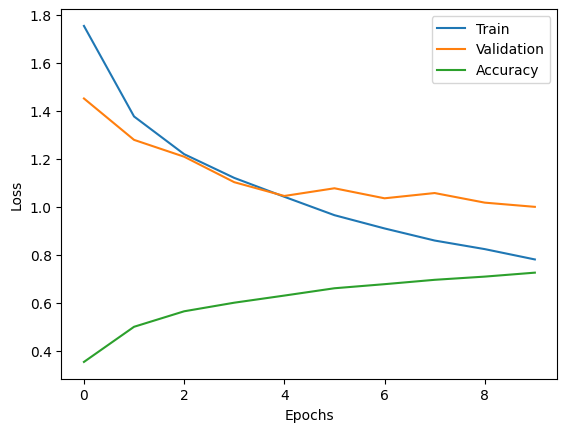

In [ ]:
def plotloss(data):
    plt.plot(data.history['loss'])
    plt.plot(data.history['val_loss'])
    plt.plot(data.history['accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation', 'Accuracy'])
    plt.show()
plotloss(historyBase)

## Improvement

Now that we have built a basic CNN, improvements are made to greatly increase the performance of the model. Batch normalization was ubiquitously incorporated post every convolutional layer. This strategy was aimed at catalyzing the learning velocity while concurrently instilling stability within the network's architecture. It employs the 'he_uniform' kernel initializer which assists in preventing the problem of vanishing or exploding gradients by setting appropriate initial kernel weights. Dropout was introduced and slowly increased as the network deepens. The number of convolutional layers was significantly increased as well as filter count and number of neurons in the dense layers.

In [ ]:
model_5 = Sequential()
model_5.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model_5.add(BatchNormalization())
model_5.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_5.add(BatchNormalization())
model_5.add(MaxPooling2D(pool_size=(2,2)))
model_5.add(Dropout(0.2))
model_5.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_5.add(BatchNormalization())
model_5.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_5.add(BatchNormalization())
model_5.add(MaxPooling2D(pool_size=(2,2)))
model_5.add(Dropout(0.3))
model_5.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_5.add(BatchNormalization())
model_5.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_5.add(BatchNormalization())
model_5.add(MaxPooling2D(pool_size=(2,2)))
model_5.add(Dropout(0.4))
model_5.add(Flatten())
model_5.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.5))
model_5.add(Dense(10, activation='softmax'))

model_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                      

In [ ]:
history_5 = model_5.fit(X_train_en, Y_train_en, epochs = 20, verbose = 1, validation_data = (X_test_en, Y_test_en))

Epoch 1/20
1563/1563 [==============================] - 18s 8ms/step - loss: 1.5948 - accuracy: 0.4462 - val_loss: 1.1130 - val_accuracy: 0.6084
Epoch 2/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0732 - accuracy: 0.6197 - val_loss: 0.9529 - val_accuracy: 0.6613
Epoch 3/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9044 - accuracy: 0.6846 - val_loss: 0.8107 - val_accuracy: 0.7255
Epoch 4/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7983 - accuracy: 0.7229 - val_loss: 0.7375 - val_accuracy: 0.7458
Epoch 5/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7181 - accuracy: 0.7545 - val_loss: 0.7089 - val_accuracy: 0.7577
Epoch 6/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6555 - accuracy: 0.7769 - val_loss: 0.5790 - val_accuracy: 0.8020
Epoch 7/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6161 - accuracy: 0.7899 - val_loss: 0.6151 - val_ac

In [ ]:
evaluation = model_5.evaluate(X_test_en, Y_test_en)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.4591 - accuracy: 0.8525
Test Accuracy: 0.8525000214576721


<Axes: >

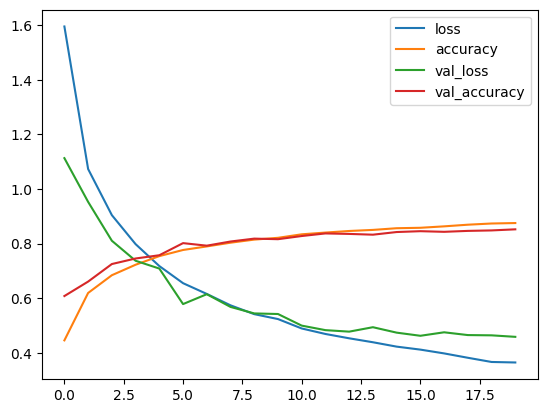

In [ ]:
pd.DataFrame(history_5.history).plot()